# **Importing Libraries**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Reading Dataset**

In [22]:
train = pd.read_csv("train_data.csv",sep=':::', names=['Sr_no', 'Movie_Name', 'Genre', 'Description'])
test = pd.read_csv("test_data.csv",sep=':::', names=['Sr_no', 'Movie_Name', 'Description'])
test_sol = pd.read_csv("test_data_solution.csv",sep=':::', names=['Sr_no', 'Movie_Name', 'Genre', 'Description'])

<ipython-input-22-a62677c5595a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv("train_data.csv",sep=':::', names=['Sr_no', 'Movie_Name', 'Genre', 'Description'])
<ipython-input-22-a62677c5595a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv("test_data.csv",sep=':::', names=['Sr_no', 'Movie_Name', 'Description'])
<ipython-input-22-a62677c5595a>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specify

In [23]:
train.head()

,Sr_no,Movie_Name,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [24]:
test.head()

,Sr_no,Movie_Name,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [25]:
train.isnull().sum()

,0
Sr_no,0
Movie_Name,0
Genre,0
Description,0


In [26]:
train.shape

(54214, 4)

In [27]:
test.shape

(54200, 3)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sr_no        54214 non-null  int64 
 1   Movie_Name   54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sr_no        54200 non-null  int64 
 1   Movie_Name   54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


# **Data Visualization**

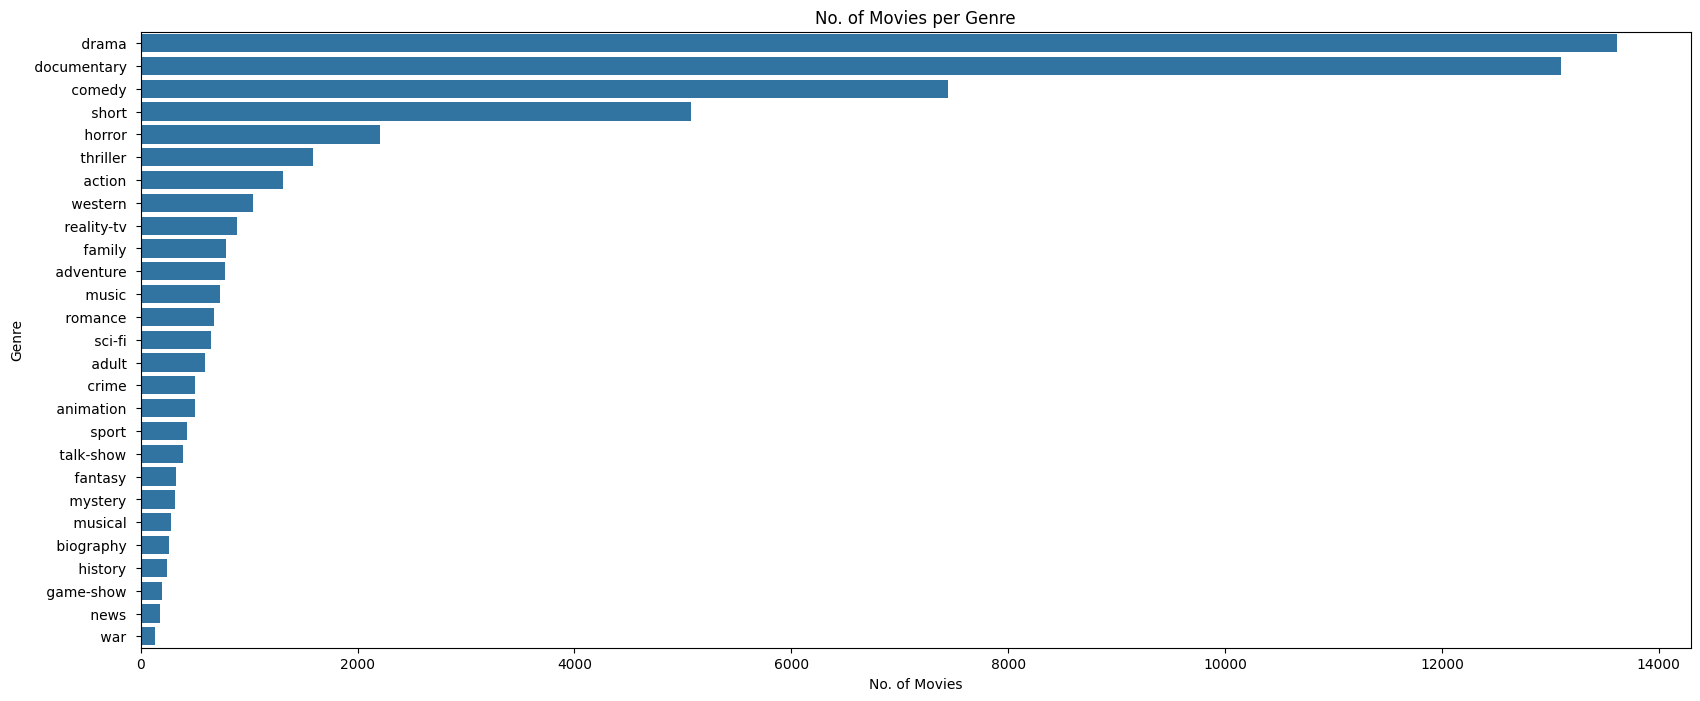

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(y=train['Genre'], order = train['Genre'].value_counts().index)
plt.title('No. of Movies per Genre')
plt.xlabel('No. of Movies')
plt.ylabel('Genre')
plt.show()

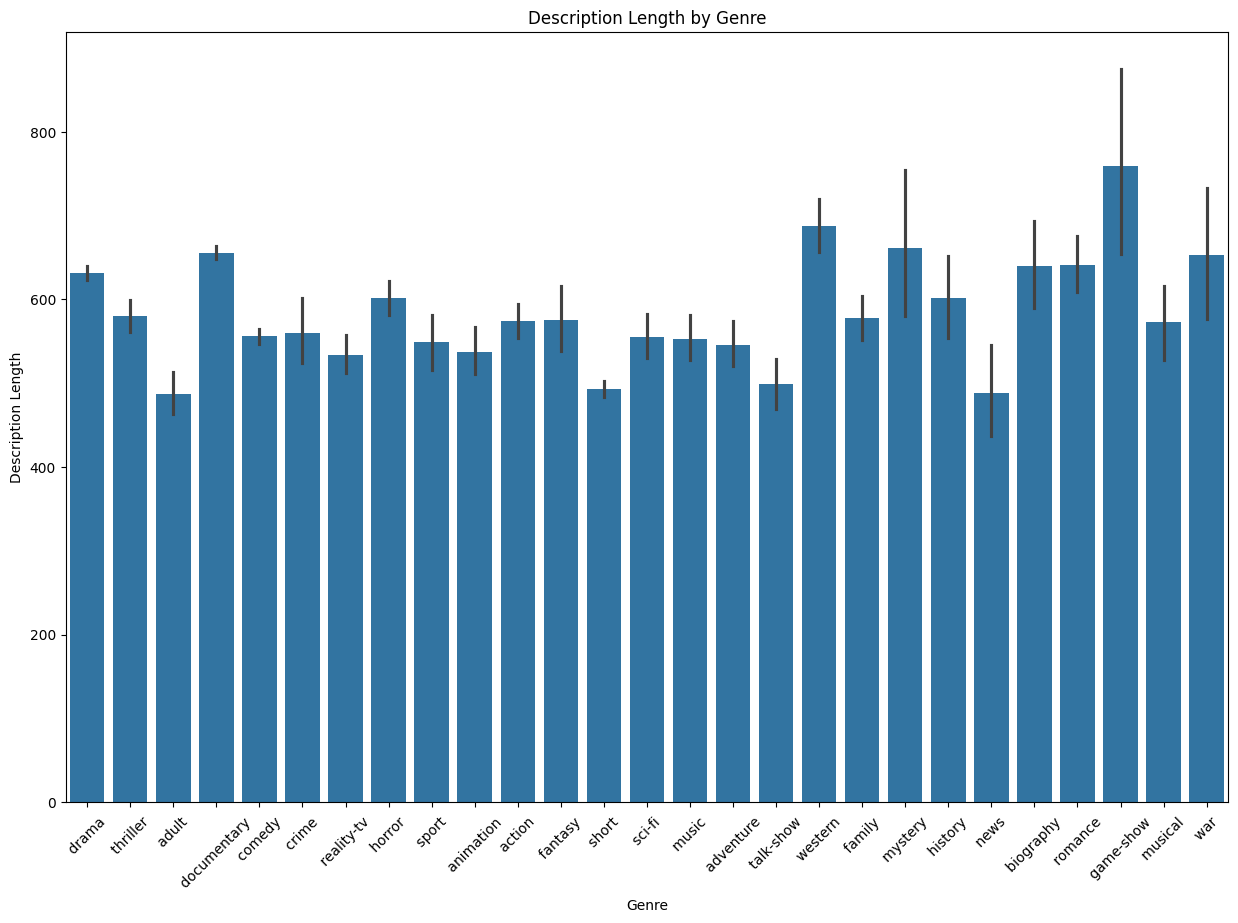

In [31]:
train['Description_length'] = train['Description'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Description_length', data=train)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

# **Splitting Data**

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words='english', max_features=100000)

X_train = vec.fit_transform(train['Description'])

y=train['Genre']

X_test = vec.fit_transform(test['Description'])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train,y,test_size=0.2,random_state=42)

# **Logistic Regression**

In [33]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [34]:
y_pred

array([' comedy ', ' drama ', ' comedy ', ..., ' drama ', ' short ',
       ' horror '], dtype=object)

In [35]:
report = classification_report(y_test, y_pred)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.59      0.20      0.30       263
       adult        0.86      0.17      0.28       112
   adventure        0.47      0.10      0.17       139
   animation        1.00      0.03      0.06       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.59      0.55      1443
       crime        0.50      0.01      0.02       107
 documentary        0.65      0.86      0.74      2659
       drama        0.53      0.81      0.64      2697
      family        0.47      0.05      0.08       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.92      0.28      0.42        40
     history        0.00      0.00      0.00        45
      horror        0.68      0.55      0.61       431
       music        0.67      0.34      0.45       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5782532509453103


# **Naive Bayes**

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [38]:
y_pred

array([' drama ', ' drama ', ' drama ', ..., ' drama ', ' documentary ',
       ' drama '], dtype='<U13')

In [39]:
report = classification_report(y_test, y_pred)
print(report)

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.60      0.05      0.09      1443
       crime        0.00      0.00      0.00       107
 documentary        0.53      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4465553813520243
